In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import clr
clr.AddReference("RegressionComputer")

from RegressionComputer import Regressor
from RegressionComputer.Models import Vector
from RegressionComputer.Models import IObject
from RegressionComputer.Models import NaiveObject
from RegressionComputer.Models import OneHotObject
from RegressionComputer.Models import FinalResult

from System import Array
from System import Double

In [7]:
def prepare_dataset(dataset_name, onehot_enabled):
    data = pd.read_csv(dataset_name)

    titles = list(data.head(0))
    features_column_titles = titles[:-1]
    class_column_title = titles[-1]

    for key in features_column_titles:
        data[key] = (data[key] - data[key].mean()) / (data[key].max() - data[key].min())

    dataset = data.drop(class_column_title, axis = 1).values.tolist()
    dataset = list(map(lambda coord: Vector(Array[Double](coord)), dataset))

    labels = data[class_column_title].tolist()
    classes_count = len(set(labels))

    if not onehot_enabled:
            return Array[IObject](list(map(lambda vector, label: NaiveObject(vector, Vector(Array[Double]([int(label) - 1]))), dataset, labels))),classes_count

    onehot_labels = []
    for label in labels:
        record = [0] * classes_count
        record[label - 1] = 1
        onehot_labels.append(Vector(Array[Double](record)))

    return Array[IObject](list(map(lambda vector, label: OneHotObject(vector, label), dataset, onehot_labels))), classes_count


In [8]:
dataset_name = "dataset.csv"

comp = Regressor()

Euclidean Cosine 0.9428345421649329
Done in: 51.9894939 seconds
6300 validations


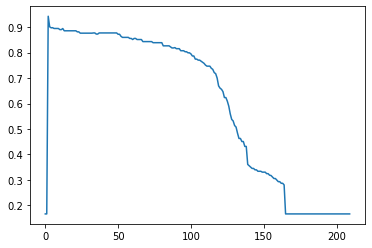

In [9]:
onehot_enabled = False

dataset, classes_count = prepare_dataset(dataset_name, onehot_enabled)

result = comp.Compute(dataset, classes_count)

xAxis = range(len(result.F1Score))
yAxis = list(result.F1Score)

print(result.DistanceFunc, result.KernelFunc, max(yAxis))
print(result.ElapsedTime)
print(result.ValidationCount, "validations")

plt.plot(xAxis, yAxis)

Euclidean Uniform 0.952464170897255
Done in: 52.2746185 seconds
6300 validations


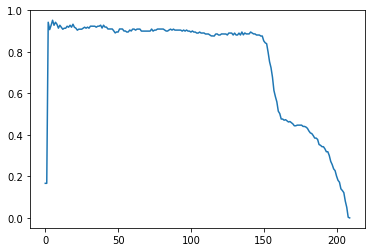

In [10]:
onehot_enabled = True

dataset, classes_count = prepare_dataset(dataset_name, onehot_enabled)

result = comp.Compute(dataset, classes_count)

xAxis = range(len(result.F1Score))
yAxis = list(result.F1Score)

print(result.DistanceFunc, result.KernelFunc, max(yAxis))
print(result.ElapsedTime)
print(result.ValidationCount, "validations")

plt.plot(xAxis, yAxis)